In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, y_test) = mnist.load_data()

In [3]:
# data pre-processing
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
# in order to plot in a 2D figure
encoding_dim = 2

In [7]:
# this is our input placeholder
input_img = Input(shape=(784,))

In [8]:
# encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

In [9]:
# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

In [11]:
# construct the autoencoder model
autoencoder = Model(inputs=input_img, outputs=decoded)
# construct the encoder model for plotting
encoder = Model(inputs=input_img, outputs=encoder_output)

In [12]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [13]:
# training
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True)

Epoch 1/20
235/235 [==============================] - 5s 19ms/step - loss: 0.0698
Epoch 2/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0566
Epoch 3/20
235/235 [==============================] - 4s 17ms/step - loss: 0.0528
Epoch 4/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0489
Epoch 5/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0467
Epoch 6/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0455
Epoch 7/20
235/235 [==============================] - 5s 19ms/step - loss: 0.0447
Epoch 8/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0442
Epoch 9/20
235/235 [==============================] - 5s 23ms/step - loss: 0.0436
Epoch 10/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0430
Epoch 11/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0426
Epoch 12/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0421
Epoch 13/20
2

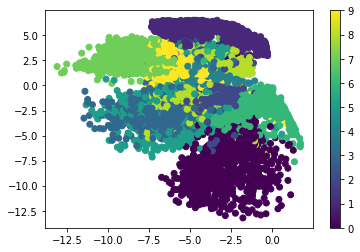

In [16]:
# plotting
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()